# Actividad Evaluable: Mapas de calor y boxplots  
1. Carga los datos.

In [321]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

datos = pd.read_csv("covid19_tweets.csv")

Modificamos las columnas 'user_created' y 'date' para poder utilizarlas en nuestras representaciones gráficas. 

In [322]:
datos['user_created'] = pd.to_datetime(datos['user_created'])
datos['user_created'] = datos['user_created'].dt.date

datos['date'] = pd.to_datetime(datos['date'])
datos['date'] = datos['date'].dt.date

Creamos tres columnas extras: dos para tener a las fechas como enteros y poder utilizarlas aún más y una para tener de forma numérica a la columna de 'user_verified'.

In [323]:
def fecha_a_numero(fecha):
    return int(fecha.strftime('%Y%m%d'))

def user_verified_num(booleano):
    if(booleano == True):
        return 1
    else:
        return 0

datos['user_created_entero'] = datos['user_created'].apply(fecha_a_numero)
datos['date_entero'] =  datos['date'].apply(fecha_a_numero)
datos['user_verified_entero'] = datos['user_verified'].apply(user_verified_num)

print(datos['user_verified_entero'].head())


0    0
1    1
2    0
3    0
4    0
Name: user_verified_entero, dtype: int64


Visualizamos cómo se ven nuestras tablas modificadas:

In [324]:
print(datos.head())

         user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description user_created  \
0  wednesday addams as a disney princess keepin i...   2017-05-26   
1  Husband, Father, Columnist & Commentator. Auth...   2009-04-16   
2  #Christian #Catholic #Conservative #Reagan #Re...   2009-02-28   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...   2019-03-07   
4  🖊️Official Twitter handle of Department of Inf...   2017-02-12   

   user_followers  user_friends  user_favourites  user_verified        date  \
0             624           950            18775          False  2020-07-25   
1            2253          1677               24           True  2020-07-25   
2            9275          9525             7254          False  2020-07-25   
3   

Realizamos boxplots.

Boxplot de "date_entero", que tiene las fechas de subida de los tweets en números enteros:

<Axes: >

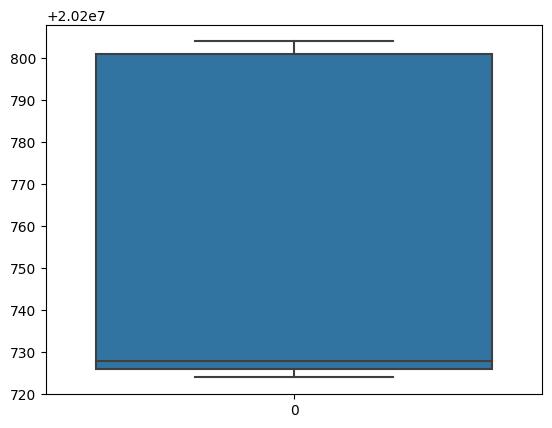

In [325]:
sns.boxplot(data=datos["date_entero"], showfliers=False)

Boxplot de "user_created_entero", que tiene las fechas de creación de usuario en números enteros:

<Axes: >

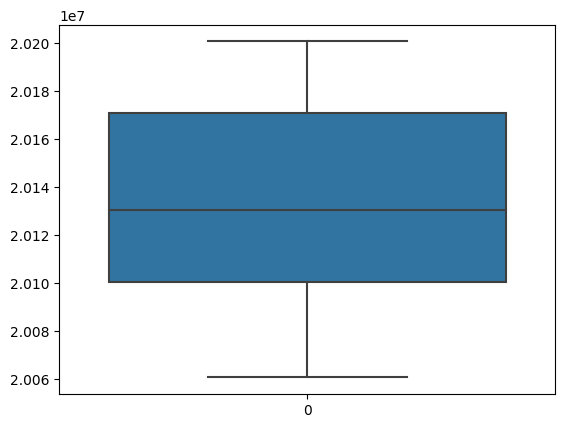

In [326]:
sns.boxplot(data=datos["user_created_entero"], showfliers=False)

Boxplot de "user_followers", que tiene la cantidad de seguidores de cada usuario:

<Axes: >

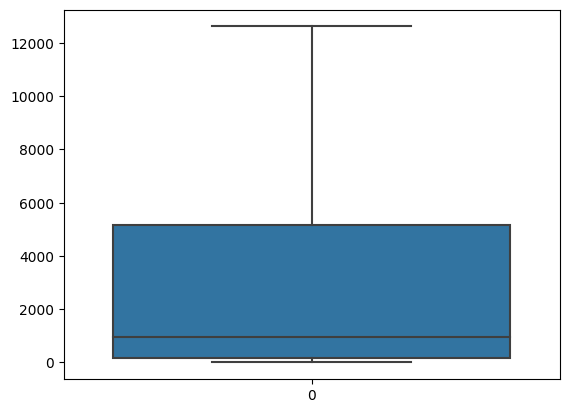

In [327]:
sns.boxplot(data=datos["user_followers"], showfliers=False)

Boxplot de "user_friends", que tiene las cantidad de amigos de cada usuario.

<Axes: >

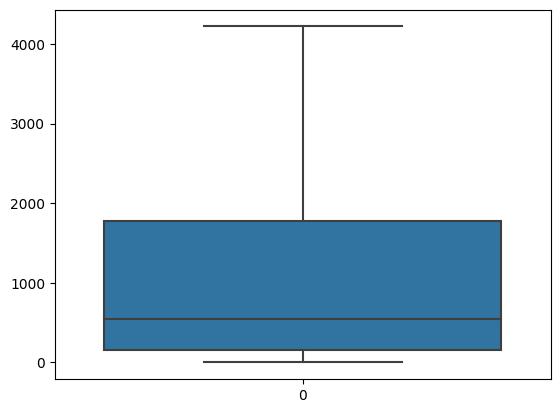

In [328]:
sns.boxplot(data=datos["user_friends"], showfliers=False)

Boxplot de "user_favourites", que tiene cantidad de favoritos de un usuario:

<Axes: >

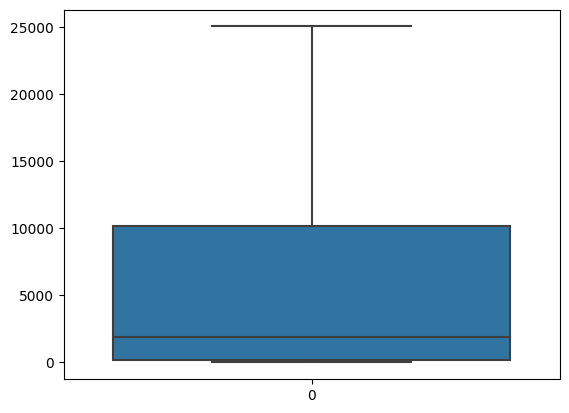

In [329]:
sns.boxplot(data=datos["user_favourites"], showfliers=False)

Histograma de fechas de subida de tweets.
Descubrimos que en general cada día se subieron el mismo número de tweets, excepto por un día de muchos más tweets y cuatro días de muchos menos tweets.

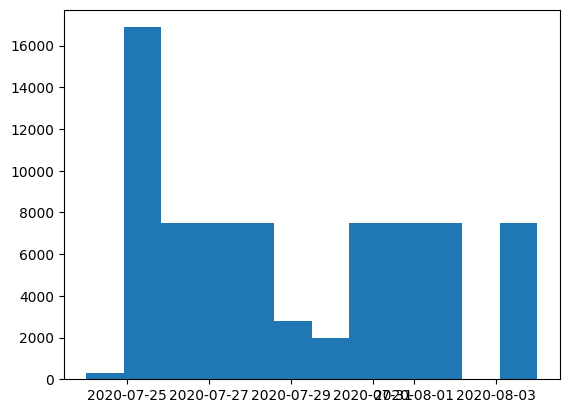

In [330]:
fig, ax = plt.subplots()
ax.hist(datos['date'], bins=12)
plt.show()

Histograma de fechas de creación de usuario. Notamos que inicia desde alrededor de 1970, entonces probablemente tenemos un dato con una fecha cerca de 1970 que debemos eliminar, ya que Twitter no existía en ese año y debe ser un dato incorrecto.

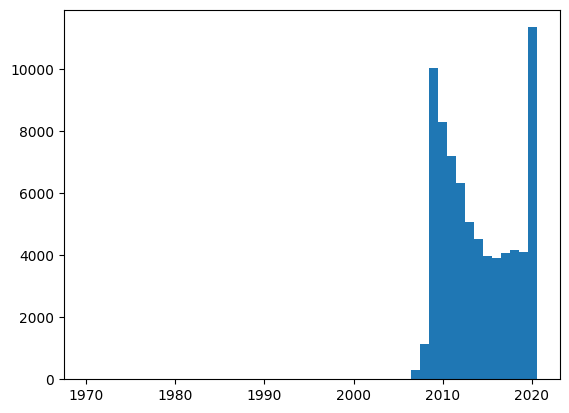

In [331]:
fig, ax = plt.subplots()
ax.hist(datos['user_created'], bins=50)
plt.show()

Eliminamos la fila con el error y creamos el nuevo histograma:

1970-01-01
2006-07-16


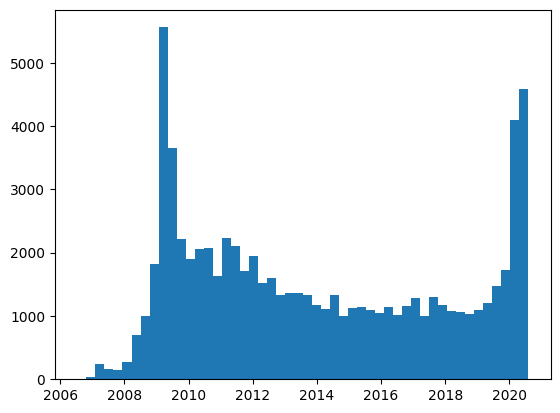

In [332]:
print(datos['user_created'].min()) # Anterior fecha mínima para la columna 'user_created'
eliminar = datos['user_created'] == datos['user_created'].min() # Encontramos la fila con el error
datos = datos.drop(datos[eliminar].index) # Eliminamos la fila con el error.
print(datos['user_created'].min()) # Nueva fecha mínima para la columna 'user_created'

fig, ax = plt.subplots()
ax.hist(datos['user_created'], bins=50)
plt.show()

Notamos que hubo un momento a mediados del 2019 en el que muchísimas personas crearon su cuenta de twitter. Antes de eso la red social fue arrancando desde abajo, teniendo inicialmente pocos usuarios nuevos. Después del pico, mantuvo una cantidad más o menos constante de nuevos usuarios, hasta un nuevo pico cerca del 2020.

Histograma de 'user_followers':

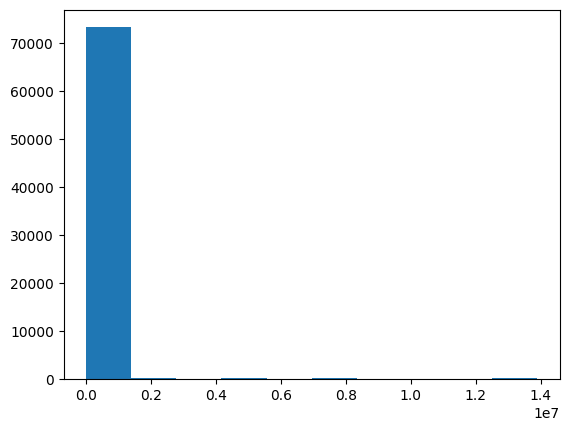

In [333]:
fig, ax = plt.subplots()
ax.hist(datos['user_followers'])
plt.show()

Histograma de 'user_friends'

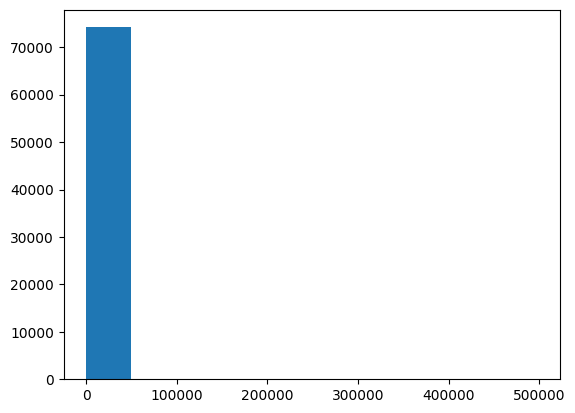

In [334]:
fig, ax = plt.subplots()
ax.hist(datos['user_friends'])
plt.show()

Histograma de 'user_favourites':

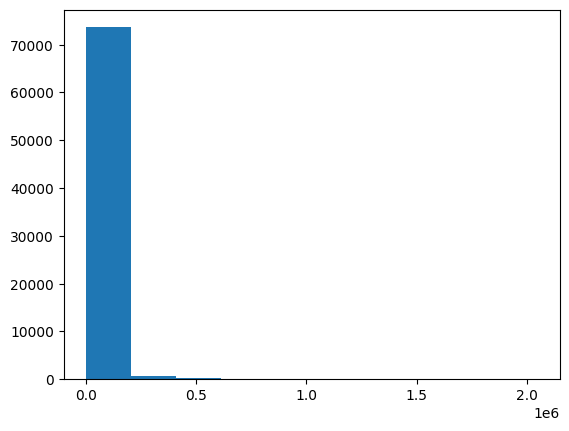

In [335]:
fig, ax = plt.subplots()
ax.hist(datos['user_favourites'])
plt.show()

Notamos que los histogramas de 'user_followers', 'user_friends' y 'user_favourites' no nos conceden demasiada información.

Histograma de 'user_verified'.

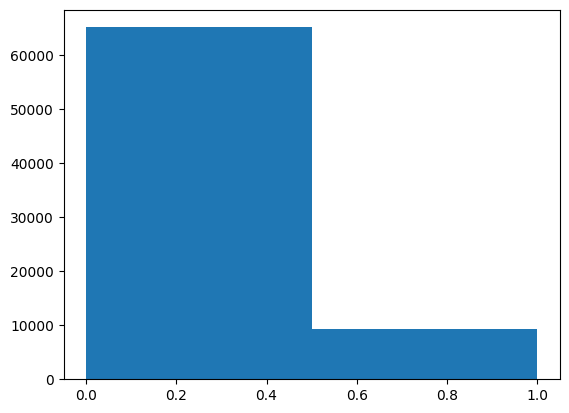

In [336]:
fig, ax = plt.subplots()
ax.hist(datos['user_verified_entero'], bins=2)
plt.show()

Notamos que la mayoría de los usuarios no están verificados.

Tabla de coeficientes de correlación:

In [337]:
datos[['user_followers', 'user_friends', 'user_favourites', 'user_created_entero', 'date_entero', 'user_verified_entero']].corr()

,user_followers,user_friends,user_favourites,user_created_entero,date_entero,user_verified_entero
user_followers,1.000000,-0.002723,-0.028724,-0.120720,-0.019683,0.322896
user_friends,-0.002723,1.000000,0.207824,-0.112197,0.009445,0.013098
user_favourites,-0.028724,0.207824,1.000000,-0.114686,0.026891,-0.060318
user_created_entero,-0.120720,-0.112197,-0.114686,1.000000,-0.027740,-0.211135
date_entero,-0.019683,0.009445,0.026891,-0.027740,1.000000,-0.023366
user_verified_entero,0.322896,0.013098,-0.060318,-0.211135,-0.023366,1.000000


Notamos que en general no hay una correlación significativa. La correlación más grande es entre la cantidad de seguidores y si un usuario está o no verificado.

Mapa de calor:

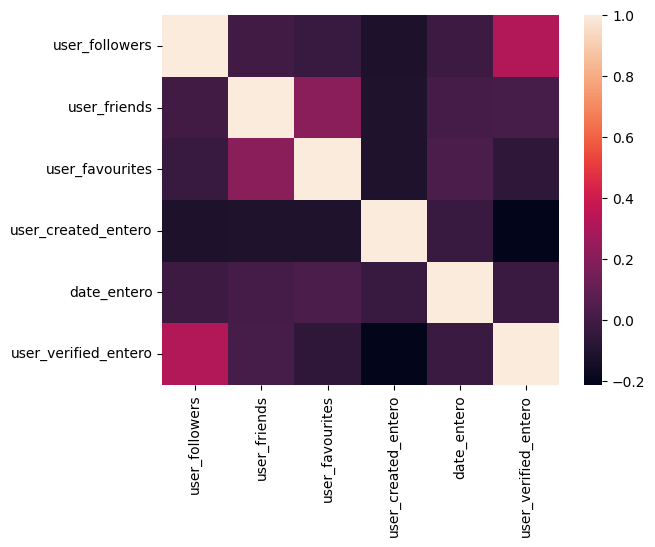

In [338]:
sns.heatmap(datos[['user_followers', 'user_friends', 'user_favourites', 'user_created_entero', 'date_entero', 'user_verified_entero']].corr());

Notamos que según el mapa de calor, no hay mucha correlación entre ninguno de nuestros datos. La mayor correlación es entre cantidad de seguidores y usuarios verificados.

¿Hay alguna variable que no aporta información?    
Sí, las variables user_name, user_location y user_description. Son personalizables y cada usuario pone lo que quiera en ellas. También la variable is_retweet, dado que siempre es False.  


Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?    
Quitaríamos user_name, user_location, user_description y is_retweet por lo mencionado en la pregunta anterior. También quitaríamos text porque tendríamos que procesar muchísimos textos distintos y hashtags por lo mismo. De igual forma quitaríamos source debido a que no aporta información que vayamos a utilizar.

¿Existen variables que tengan datos extraños?  
Sí, las variables user_name, user_location y user_description. Son personalizables y cada usuario pone lo que quiera en ellas, incluyendo símbolos extraños y caracteres que no reconoce el software que estamos utilizando.

Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?  
Hay distintos rangos. Los rangos de fechas son exclusivos para las fechas. Los rangos de las variables user_followers, user_friends y user_favourites son similares porque miden datos similares, dados por interacciones de personas. Los valores que puede tomar user_verified_entero son {0,1}, lo cual lo hace único. Sí va a afectar al análisis de los datos, cuando tomamos en cuenta los centros usando kmeans. Si una variable consta de 0 y 1 y otra variable tiene datos que se encuentran en los millones, la variable menor va a tener muy poca influencia al momento de hallar los centros. Es por esto que en la actividad siguiente, de los kmeans, haremos que el orden de magnitud de ambas variables sea el mismo, para que ambas influyan de igual forma al encontrar los centros.

¿Puedes encontrar grupos que se parezcan? ¿Qué grupos son estos?  
Sí, los grupos de fechas son los que mejor se vieron reflejados en histogramas, ya que los demás grupos tenían muchos datos similares y pocos datos muy grandes o únicamente dos posibles valores. Las fechas tienen diagramas de bigotes centrados, mientras que user_followers, user_friends y user_favourites tienne diagramas de bigotes más bien inclinados a estar hacia abajo del centro.